**Analysis of Job Opportunities in Indian Cities**

Author: Ajay Rangan Kasturirangan <br>
[GitHub](https://github.com/ajay1808), [Twitter](https://twitter.com/rangan_ajay) 

This code uses a basic webscaper for [in.indeed.com](https://in.indeed.com/) which is a job search portal in India. It uses the following code you can find in my [Github](https://github.com/ajay1808/Web-Scraping-Projects/blob/main/Indeed_Web_Scraper.ipynb) profile.

This will compare multiple Indian cities on the basis of job opportunities of a certain job position. For the example of this report I will take position of Data Analyst.

Let's insert the code for the Webscraper as used in my [Github](https://github.com/ajay1808/Web-Scraping-Projects/blob/main/Indeed_Web_Scraper.ipynb)

In [1]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import csv
import pandas as pd
import seaborn as sns
from time import sleep
from random import randint
from datetime import datetime

def get_url(position, location):
        position = position.replace(" ","%20")
        location = location.replace(" ","%20")
        template = 'https://in.indeed.com/jobs?q={}&l={}'
        url = template.format(position, location)
        return url

def get_record(card):
    '''Extract job date from a single record '''
    try:
        job_title = card.find('h2', 'jobTitle').text.strip()
    except AttributeError:
        job_title = ''
    try:
        company = card.find('span', 'companyName').text.strip()
    except AttributeError:
        company = ''
    try:
        location = card.find('div', 'companyLocation').text.strip()
    except AttributeError:
        location = ''
    try:
        job_summary = card.find('div', 'job-snippet').text.strip()
    except AttributeError:
        job_summary = ''
    try:
        post_date = card.find('span', 'date').text.strip()
        post_date = post_date[6:]
    except AttributeError:
        post_date = ''
    try:
        salary = card.find('div', 'attribute_snippet').text.strip()
    except AttributeError:
        salary = ''
    
    #extract_date = datetime.today().strftime('%Y-%m-%d')
    #job_url = 'https://www.in.indeed.com' + atag.get('href')
    
    return (job_title, company, location, job_summary, salary, post_date)

def main(position, location):
    records = []  
    count = 0
    url = get_url(position, location)
    purl = url 
    while True:
        count += 1
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        cards = soup.find_all('div', 'job_seen_beacon')


        for card in cards:
            record = get_record(card)
            records.append(record)
        try:
            url = 'https://in.indeed.com' + soup.find('a', {'aria-label': 'Next'}).get('href')
            delay = randint(1, 10)
            sleep(delay)
        except AttributeError:
            print(location)
            print("Number of web pages surfed: ",count)
            print("")
            break
    recorddata = pd.DataFrame(data = records, columns =['Job Title', 'Company', 'Location', 'Summary', 'Salary', 'Posted Date'] )
    return recorddata

Now lets get our Indian City Dataset so we can compare different Indian cities

In [2]:
Cities = pd.read_html('https://statisticstimes.com/demographics/country/india-cities-population.php')[1]
Columns = []
for i in range(len(Cities.columns)):
  Columns.append(Cities.columns[i][1])
Cities.columns  = Columns
Cities.head()

,Rank,City,2020,2021,Share (%),Population,(%)
0,1,Delhi,30290936,31181377,2.240,890441,2.94
1,2,Mumbai (Bombay),20411274,20667655,1.480,256381,1.26
2,3,Kolkata (Calcutta),14850066,14974073,1.070,124007,0.84
3,4,Bangalore,12326532,12764935,0.916,438403,3.56
4,5,Chennai (Madras),10971108,11235018,0.806,263910,2.41


In [3]:
Cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        181 non-null    int64  
 1   City        181 non-null    object 
 2   2020        181 non-null    int64  
 3   2021        181 non-null    int64  
 4   Share (%)   181 non-null    float64
 5   Population  181 non-null    int64  
 6   (%)         181 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 10.0+ KB


Now it is time to perform some basic cleaning on the data<br>
Let us first remove the names in the brackets.

In [4]:
for i in range(len(Cities)):
  Cities['City'][i] = Cities['City'].str.split("(")[i][0]
Cities.head()

<ipython-input-4-74def4633d8f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cities['City'][i] = Cities['City'].str.split("(")[i][0]


,Rank,City,2020,2021,Share (%),Population,(%)
0,1,Delhi,30290936,31181377,2.240,890441,2.94
1,2,Mumbai,20411274,20667655,1.480,256381,1.26
2,3,Kolkata,14850066,14974073,1.070,124007,0.84
3,4,Bangalore,12326532,12764935,0.916,438403,3.56
4,5,Chennai,10971108,11235018,0.806,263910,2.41


We only require the City, rank and population column for our analysis

In [5]:
Cities = Cities[['Rank','City','2021','(%)']]
Cities.rename(columns = {'2021':'Population','(%)':'Growth'},inplace = True)
Cities.head()

,Rank,City,Population,Growth
0,1,Delhi,31181377,2.94
1,2,Mumbai,20667655,1.26
2,3,Kolkata,14974073,0.84
3,4,Bangalore,12764935,3.56
4,5,Chennai,11235018,2.41


Let us see the top 10 cities by population

In [6]:
Cities[Cities[['Rank','City']]['Rank'] <= 10]

,Rank,City,Population,Growth
0,1,Delhi,31181377,2.94
1,2,Mumbai,20667655,1.26
2,3,Kolkata,14974073,0.84
3,4,Bangalore,12764935,3.56
4,5,Chennai,11235018,2.41
5,6,Hyderabad,10268653,2.64
6,7,Ahmadabad,8253226,2.40
7,8,Surat,7489742,4.25
8,9,Pune,6807984,2.69
9,10,Jaipur,4007505,2.51


Let us extract data about data analyst jobs in all these cities

In [7]:
CityList = Cities[:10]['City'].tolist()
CityList

['Delhi',
 'Mumbai ',
 'Kolkata ',
 'Bangalore',
 'Chennai ',
 'Hyderabad',
 'Ahmadabad',
 'Surat',
 'Pune ',
 'Jaipur']

In [8]:
JobData = pd.DataFrame(columns = ['Job Title', 'Company', 'Location', 'Summary', 'Salary', 'Posted Date'])
CityCol = []
for i in range(len(CityList)):
  record = main("Data Analyst",CityList[i])
  JobData = pd.concat([JobData,record])
  CityCol.append(CityList[i]*len(record))
JobData.head()

Delhi
Number of web pages surfed:  19

Mumbai 
Number of web pages surfed:  62

Kolkata 
Number of web pages surfed:  6

Bangalore
Number of web pages surfed:  67

Chennai 
Number of web pages surfed:  36

Hyderabad
Number of web pages surfed:  59

Ahmadabad
Number of web pages surfed:  7

Surat
Number of web pages surfed:  2

Pune 
Number of web pages surfed:  55

Jaipur
Number of web pages surfed:  3



,Job Title,Company,Location,Summary,Salary,Posted Date
0,newJunior Analyst - Survey Analytics,Boston Consulting Group,"New Delhi, Delhi",Able to quickly learn and use specialized surv...,,3 days ago
1,Junior Analyst - GAMMA,Boston Consulting Group,"New Delhi, Delhi",Analytical reasoning and complex problem solvi...,,10 days ago
2,IT Operations Analyst,Boston Consulting Group,"New Delhi, Delhi","Basic understanding of the database, data mode...",,30+ days ago
3,newData Entry Analyst,Vamstar,"New Delhi, Delhi","Maintaining and improving our existing tools, ...","₹16,000 - ₹19,000 a month",Today
4,newData Analyst,ARDH SAINIK SERVICES PVT LTD,"Pitampura, Delhi",Acquiring data from primary and secondary sour...,"₹20,000 - ₹30,000 a month",erActive 5 days ago


In [9]:
JobData['Location'].unique()

array(['New Delhi, Delhi', 'Pitampura, Delhi', 'Delhi, Delhi',
       'Temporarily Remote in Delhi, Delhi', 'India',
       'Connaught Place, Delhi, Delhi', 'Patparganj, Delhi, Delhi',
       'Remote in Delhi, Delhi', 'Gurgaon Road, Delhi',
       'Bhajan Pura, Delhi', 'Remote in New Delhi, Delhi',
       'Lajpat Nagar, Delhi, Delhi', 'Delhi', 'Saket, Delhi',
       'Temporarily Remote in New Delhi, Delhi', 'Jasola, Delhi, Delhi',
       'Pitampura, Delhi, Delhi', 'Kalkaji, Delhi, Delhi',
       'Mehrau;I, Delhi', 'Sushant Lok, Delhi, Delhi',
       'New Delhi, Delhi+1 location', 'Mumbai, Maharashtra',
       'Remote in Mumbai, Maharashtra', 'Mumbai, Maharashtra+1 location',
       'Navi Mumbai, Maharashtra', 'Vikhroli, Mumbai, Maharashtra',
       'Hybrid remote in Mumbai, Maharashtra',
       'Temporarily Remote in Mumbai, Maharashtra',
       'Vashi, Navi Mumbai, Maharashtra',
       'Lower Parel, Mumbai, Maharashtra',
       'Hybrid remote in Navi Mumbai, Maharashtra', 'Thane, Maha

In [10]:
index = np.linspace(0,len(JobData)-1,len(JobData))
index = [ int(x) for x in index ]

In [11]:
CityColList = []
NewCityColList =[]
for i in range(len(CityCol)):
  element = [CityList[i]] * (len(CityCol[i])//len(CityList[i]))
  CityColList.append(element)
for i in range(len(CityColList)):
  for j in range(len(CityColList[i])):
    NewCityColList.append(CityColList[i][j])
JobData['City'] = NewCityColList
JobData.head()

,Job Title,Company,Location,Summary,Salary,Posted Date,City
0,newJunior Analyst - Survey Analytics,Boston Consulting Group,"New Delhi, Delhi",Able to quickly learn and use specialized surv...,,3 days ago,Delhi
1,Junior Analyst - GAMMA,Boston Consulting Group,"New Delhi, Delhi",Analytical reasoning and complex problem solvi...,,10 days ago,Delhi
2,IT Operations Analyst,Boston Consulting Group,"New Delhi, Delhi","Basic understanding of the database, data mode...",,30+ days ago,Delhi
3,newData Entry Analyst,Vamstar,"New Delhi, Delhi","Maintaining and improving our existing tools, ...","₹16,000 - ₹19,000 a month",Today,Delhi
4,newData Analyst,ARDH SAINIK SERVICES PVT LTD,"Pitampura, Delhi",Acquiring data from primary and secondary sour...,"₹20,000 - ₹30,000 a month",erActive 5 days ago,Delhi


In [12]:
JobData['index'] = index
JobData = JobData.set_index('index')
JobData

,Job Title,Company,Location,Summary,Salary,Posted Date,City
index,,,,,,,
0,newJunior Analyst - Survey Analytics,Boston Consulting Group,"New Delhi, Delhi",Able to quickly learn and use specialized surv...,,3 days ago,Delhi
1,Junior Analyst - GAMMA,Boston Consulting Group,"New Delhi, Delhi",Analytical reasoning and complex problem solvi...,,10 days ago,Delhi
2,IT Operations Analyst,Boston Consulting Group,"New Delhi, Delhi","Basic understanding of the database, data mode...",,30+ days ago,Delhi
3,newData Entry Analyst,Vamstar,"New Delhi, Delhi","Maintaining and improving our existing tools, ...","₹16,000 - ₹19,000 a month",Today,Delhi
4,newData Analyst,ARDH SAINIK SERVICES PVT LTD,"Pitampura, Delhi",Acquiring data from primary and secondary sour...,"₹20,000 - ₹30,000 a month",erActive 5 days ago,Delhi
...,...,...,...,...,...,...,...
4647,Business Analyst (Pre-Sales),RG infotech,"Jaipur, Rajasthan",Provides analytic support by coordinating data...,"₹10,000 a month",30+ days ago,Jaipur
4648,Business Analyst,Jobingo HR Solutions,"Jaipur, Rajasthan","Initiate to gather data, analyse, interpret an...","₹25,000 - ₹35,000 a month",25 days ago,Jaipur
4649,Business Analyst ( Post sales),DevTechnosys,"Jaipur, Rajasthan",Quickly understands the business issues and da...,,30+ days ago,Jaipur


In [13]:
JobData.shape

(4652, 7)

We have a total of 4000 + Data Analyst Job Postings in the Top 10 most populous cities in India posted on Indeed. (As of 7/5/2022) <br>
Now lets build some visualizations to understand the data.

In [14]:
JobData.nunique()

Job Title      3297
Company        1578
Location        120
Summary        3922
Salary          147
Posted Date      59
City             10
dtype: int64

In [15]:
JobCount = []
for i in range(len(Cities)):
    count = 0
    for j in range(len(JobData)):
        if Cities['City'][i] == JobData['City'][j]:
            count += 1
    JobCount.append(count)
Cities['Count'] = JobCount
Cities

,Rank,City,Population,Growth,Count
0,1,Delhi,31181377,2.94,277
1,2,Mumbai,20667655,1.26,918
2,3,Kolkata,14974073,0.84,78
3,4,Bangalore,12764935,3.56,1005
4,5,Chennai,11235018,2.41,540
...,...,...,...,...,...
176,177,Arrah,337114,2.35,0
177,178,Nizamabad,336657,0.96,0
178,179,Kharagpur,330427,1.11,0
179,180,Hapur,327349,2.07,0


In [16]:
TopTen = Cities[0:10]
rec = []
for i in range(len(TopTen)):
    rec.append(Cities['Count'][i] / Cities['Population'][i] *100000)
TopTen['Jobs/1LCapita'] = rec
TopTen

<ipython-input-16-878c043d163f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TopTen['Jobs/1LCapita'] = rec


,Rank,City,Population,Growth,Count,Jobs/1LCapita
0,1,Delhi,31181377,2.94,277,0.888351
1,2,Mumbai,20667655,1.26,918,4.441723
2,3,Kolkata,14974073,0.84,78,0.520900
3,4,Bangalore,12764935,3.56,1005,7.873131
4,5,Chennai,11235018,2.41,540,4.806401
5,6,Hyderabad,10268653,2.64,866,8.433433
6,7,Ahmadabad,8253226,2.40,96,1.163182
7,8,Surat,7489742,4.25,18,0.240329
8,9,Pune,6807984,2.69,819,12.029993
9,10,Jaipur,4007505,2.51,35,0.873361


It is fairly clear that Mumbai, Bangalore, Hyderabad and Pune are leaders in the Industry. Followed by Chennai and then Delhi.
But are these jobs correlated to the population of the city? 
Or do some cities have a higher ratio of Data Analyst jobs to its population. Let us check.

<AxesSubplot:xlabel='Population', ylabel='Count'>

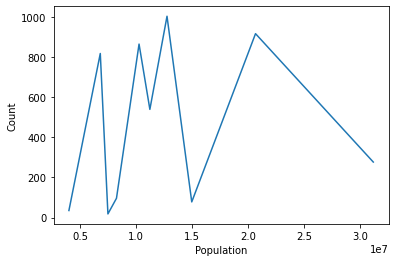

In [17]:
sns.lineplot(data=TopTen,x='Population',y='Count')

There is clearly no correlation between population and Job Postings. Which Clearly indicates Cities having differently leveled preferences to Data Analyst Jobs.

In [18]:
TopTen = TopTen.sort_values('Jobs/1LCapita',ascending = False)
TopTen

,Rank,City,Population,Growth,Count,Jobs/1LCapita
8,9,Pune,6807984,2.69,819,12.029993
5,6,Hyderabad,10268653,2.64,866,8.433433
3,4,Bangalore,12764935,3.56,1005,7.873131
4,5,Chennai,11235018,2.41,540,4.806401
1,2,Mumbai,20667655,1.26,918,4.441723
6,7,Ahmadabad,8253226,2.40,96,1.163182
0,1,Delhi,31181377,2.94,277,0.888351
9,10,Jaipur,4007505,2.51,35,0.873361
2,3,Kolkata,14974073,0.84,78,0.520900
7,8,Surat,7489742,4.25,18,0.240329


We Now have a different Image. Let us plot this in a bar plot

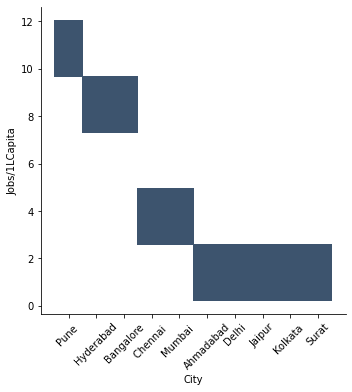

In [19]:
ax = sns.displot(data=TopTen,x='City',y='Jobs/1LCapita')
bx = ax.set_xticklabels(labels=TopTen['City'].unique(),rotation=45)

Here we see a different picture. The concentration of Data Analyst Jobs with respect to population is highest in Pune followed by Hyderabad despite Bangalore and Mumbai showing the maximum count of jobs. This indicates an industry concentration in the economy of the city.
Assuming an equal distribution of skillset among people in the cities, this indicates the competition to get a job in Pune is lesser. But in all practicality, we cannot claim this as the skillset of people depends on the insitutes in the city, the culture and even migration to the city by profesionals alters this fabric.

Let us now forecast the amount of jobs that will be available in each city one year from now assuming jobs grow equally proportionate to the population.

In [20]:
rec = []
for i in range(len(TopTen)):
    rec.append(int(TopTen['Count'][i] * ( 1 + (TopTen['Growth'][i]/100))))
TopTen['Jobs Forecast'] = rec
TopTen = TopTen.sort_values('Jobs Forecast',ascending=False)
TopTen

,Rank,City,Population,Growth,Count,Jobs/1LCapita,Jobs Forecast
4,5,Chennai,11235018,2.41,540,4.806401,1040
5,6,Hyderabad,10268653,2.64,866,8.433433,929
6,7,Ahmadabad,8253226,2.40,96,1.163182,888
2,3,Kolkata,14974073,0.84,78,0.520900,841
1,2,Mumbai,20667655,1.26,918,4.441723,553
8,9,Pune,6807984,2.69,819,12.029993,285
0,1,Delhi,31181377,2.94,277,0.888351,98
3,4,Bangalore,12764935,3.56,1005,7.873131,78
7,8,Surat,7489742,4.25,18,0.240329,35
9,10,Jaipur,4007505,2.51,35,0.873361,18


The trend seems to be constant as the growth percentage of most of the large cities seem to be at a lesser percentage.

Do smaller cities have greater population growth or do larger cities have greater poopulation growth? Lets see

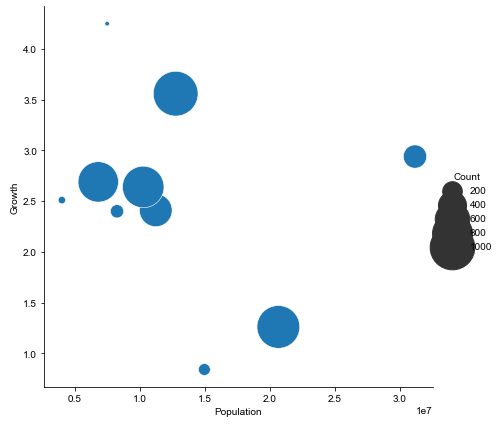

In [21]:
sns.relplot(x="Population", y="Growth", size="Count",
            sizes=(20, 2000), alpha=1,
            height=6, data=Cities[:10])
sns.set(rc={'figure.figsize':(12,50)})

From the above plot there doesn't seem to be any pattern that we can observe to correlate growth, population and Data Analyst Job Count.

Now lets work on the salary data and see if the salary is higher in certain cities

Let us Start by cleaning the Salary Data

In [22]:
JobData['Salary'].unique()

array(['', '₹16,000 - ₹19,000 a month', '₹20,000 - ₹30,000 a month',
       '₹5,000 a month', '₹3,50,000 - ₹5,00,000 a year',
       '₹40,000 - ₹90,000 a month', '₹10,00,000 - ₹15,00,000 a year',
       '₹60,000 - ₹70,000 a month', '₹50,000 - ₹75,000 a month',
       '₹10,000 - ₹30,000 a month', '₹6,00,000 - ₹8,00,000 a year',
       '₹25,000 - ₹45,000 a month', '₹1,50,000 - ₹6,00,000 a year',
       '₹4,81,252 - ₹15,16,627 a year', '₹20,000 - ₹25,000 a month',
       '₹32,000 a month', '₹3,75,000 - ₹6,00,000 a year',
       '₹12,000 a month', '₹2,50,000 a year',
       '₹21,00,000 - ₹25,00,000 a year', '₹8,00,000 - ₹12,00,000 a year',
       '₹12,00,000 - ₹17,00,000 a year', '₹11,00,000 - ₹13,00,000 a year',
       '₹6,00,000 a year', '₹5,00,000 - ₹10,00,000 a year',
       '₹8,000 - ₹12,000 a month', '₹15,000 - ₹35,000 a month',
       '₹2,00,000 - ₹3,00,000 a year', '₹6,00,000 - ₹10,00,000 a year',
       '₹3,50,000 a year', '₹15,000 a month',
       '₹2,50,000 - ₹4,00,000 a year', 

In [23]:
rec=[]
for i in range(len(JobData)):
    if 'month' in JobData['Salary'][i]:
        rec.append('month')
    elif 'year' in JobData['Salary'][i]:
        rec.append('year')
    elif 'hour' in JobData['Salary'][i]:
        rec.append('hour')
    elif 'week' in JobData['Salary'][i]:
        rec.append('week')
    else:
        rec.append('')
JobData['Salary Type'] = rec
JobData['Salary Type'].unique()

array(['', 'month', 'year', 'week', 'hour'], dtype=object)

In [24]:
JobData['Cleaned Salary'] = JobData['Salary'].str.replace(",","").str.replace("a year","").str.replace("a month","").str.replace("a week","").str.replace("an hour","").str.replace("₹","").str.replace(" ","").str.strip()
JobData['Cleaned Salary'].unique()

array(['', '16000-19000', '20000-30000', '5000', '350000-500000',
       '40000-90000', '1000000-1500000', '60000-70000', '50000-75000',
       '10000-30000', '600000-800000', '25000-45000', '150000-600000',
       '481252-1516627', '20000-25000', '32000', '375000-600000', '12000',
       '250000', '2100000-2500000', '800000-1200000', '1200000-1700000',
       '1100000-1300000', '600000', '500000-1000000', '8000-12000',
       '15000-35000', '200000-300000', '600000-1000000', '350000',
       '15000', '250000-400000', '50000-60000', '750000-1600000',
       '400000-500000', '2750000-3250000', '1000000', '90000-120000',
       '3000000-3500000', '1200000-2500000', '500000-700000',
       '1500000-2000000', '25000-28000', '25000-35000', '15000-20000',
       '800000-1800000', '300000-600000', '1000000-2500000',
       '1000000-1450000', '2000000', '500000-600000', '50000-90000',
       '400000-600000', '25000-30000', '186641-350000', '3000', '1500000',
       '18000', '11000-13000', '342

In [25]:
rec=[]
for i in range(len(JobData)):
    if JobData['Cleaned Salary'][i] == "":
        rec.append(None)
    elif '-' in JobData['Cleaned Salary'][i]:
        temp = JobData['Cleaned Salary'][i].split("-")
        rec.append(     int(   (int(temp[0])+int(temp[1]) )  // 2    )   )
    else:
        rec.append(int(JobData['Cleaned Salary'][i]))
JobData['Salary/Duration'] = rec
JobData['Salary/Duration'].unique()
        

array([         nan, 1.750000e+04, 2.500000e+04, 5.000000e+03,
       4.250000e+05, 6.500000e+04, 1.250000e+06, 6.250000e+04,
       2.000000e+04, 7.000000e+05, 3.500000e+04, 3.750000e+05,
       9.989390e+05, 2.250000e+04, 3.200000e+04, 4.875000e+05,
       1.200000e+04, 2.500000e+05, 2.300000e+06, 1.000000e+06,
       1.450000e+06, 1.200000e+06, 6.000000e+05, 7.500000e+05,
       1.000000e+04, 8.000000e+05, 3.500000e+05, 1.500000e+04,
       3.250000e+05, 5.500000e+04, 1.175000e+06, 4.500000e+05,
       3.000000e+06, 1.050000e+05, 3.250000e+06, 1.850000e+06,
       1.750000e+06, 2.650000e+04, 3.000000e+04, 1.300000e+06,
       1.225000e+06, 2.000000e+06, 5.500000e+05, 7.000000e+04,
       5.000000e+05, 2.750000e+04, 2.683200e+05, 3.000000e+03,
       1.500000e+06, 1.800000e+04, 5.712070e+05, 1.125404e+06,
       6.004520e+05, 8.896900e+04, 4.750000e+05, 1.550000e+06,
       8.000000e+04, 1.100000e+04, 1.100000e+06, 9.000000e+05,
       1.547600e+04, 1.650000e+06, 2.734360e+05, 4.2000

In [26]:
rec = []
for i in range(len(JobData)):
    if JobData['Salary Type'][i] == '':
        rec.append(None)
    elif JobData['Salary Type'][i] == 'year':
        rec.append(JobData['Salary/Duration'][i])
    elif JobData['Salary Type'][i] == 'month':
        rec.append(JobData['Salary/Duration'][i] * 12)
    elif JobData['Salary Type'][i] == 'week':
        rec.append(JobData['Salary/Duration'][i] * 4)
    else :
        rec.append(JobData['Salary/Duration'][i] * 8 * 20)               #Assuming 20 working days a month and 8 hours a day
JobData['Adjusted Salary'] = rec
JobData['Adjusted Salary'].unique()

array([     nan,  210000.,  300000.,   60000.,  425000.,  780000.,
       1250000.,  750000.,  240000.,  700000.,  420000.,  375000.,
        998939.,  270000.,  384000.,  487500.,  144000.,  250000.,
       2300000., 1000000., 1450000., 1200000.,  600000.,  120000.,
        800000.,  350000.,  180000.,  325000.,  660000., 1175000.,
        450000., 3000000., 1260000., 3250000., 1850000., 1750000.,
        318000.,  360000., 1300000., 1225000., 2000000., 6600000.,
        840000.,  500000.,  330000.,  268320.,   36000., 1500000.,
        216000.,  571207., 1125404.,  600452., 1067628.,  475000.,
       1550000.,  960000.,  132000., 1100000.,  900000.,  185712.,
       1650000.,  273436.,  540000.,   99396., 1050000.,  150000.,
        811400.,  810000., 1150000.,  650000., 1495047.,  400000.,
         63125.,  204000.,   30000.,  344782.,  223080.,  388284.,
        275000.,  404796.,  390000.,   78000.,  986429.,  234000.,
        278952.,  663096.,  222000.,  160000.,  252000.,  5600

Let us compare the salaries across the top 10 Cities

In [27]:
rec = []
reccount = []
for i in range(len(TopTen)):
    count = 0
    total = 0
    for j in range(len(JobData)):
        if TopTen['City'][i] == JobData['City'][j]:
            if JobData['Adjusted Salary'][j] > 0:
                count += 1
                total += JobData['Adjusted Salary'][j]
    if count == 0 or total ==0:
        rec.append(None)
        reccount.append(0)
    else:
        rec.append(int(total/count))
        reccount.append(count)
TopTen['Average Salary'] = rec
TopTen['Listings with Salary'] = reccount
print(TopTen['Average Salary'].unique(),TopTen['Listings with Salary'].unique())

[ 671565 1061264 1700000  774058  647424  607678  438524  252559  487897
  381428] [22 34  5 37  8 20  6 36  7]


In [28]:
TopTen

,Rank,City,Population,Growth,Count,Jobs/1LCapita,Jobs Forecast,Average Salary,Listings with Salary
4,5,Chennai,11235018,2.41,540,4.806401,1040,671565,22
5,6,Hyderabad,10268653,2.64,866,8.433433,929,1061264,34
6,7,Ahmadabad,8253226,2.40,96,1.163182,888,1700000,5
2,3,Kolkata,14974073,0.84,78,0.520900,841,774058,37
1,2,Mumbai,20667655,1.26,918,4.441723,553,647424,8
8,9,Pune,6807984,2.69,819,12.029993,285,607678,20
0,1,Delhi,31181377,2.94,277,0.888351,98,438524,6
3,4,Bangalore,12764935,3.56,1005,7.873131,78,252559,5
7,8,Surat,7489742,4.25,18,0.240329,35,487897,36
9,10,Jaipur,4007505,2.51,35,0.873361,18,381428,7


[Text(0, 0, 'Chennai '),
 Text(1, 0, 'Hyderabad'),
 Text(2, 0, 'Ahmadabad'),
 Text(3, 0, 'Kolkata '),
 Text(4, 0, 'Mumbai '),
 Text(5, 0, 'Pune '),
 Text(6, 0, 'Delhi'),
 Text(7, 0, 'Bangalore'),
 Text(8, 0, 'Surat'),
 Text(9, 0, 'Jaipur')]

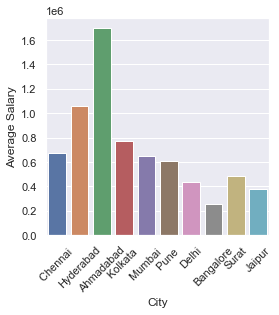

In [29]:
sns.set(rc={'figure.figsize':(4,4)})
ax = sns.barplot(data=TopTen,x='City',y='Average Salary')
ax.set_xticklabels(labels=TopTen['City'].unique(),rotation=45)

The plot seems to be rather inconsistent given Ahmadabad has almost 3 times the salary of the 2nd highest city. Let us investigate why this is the case.

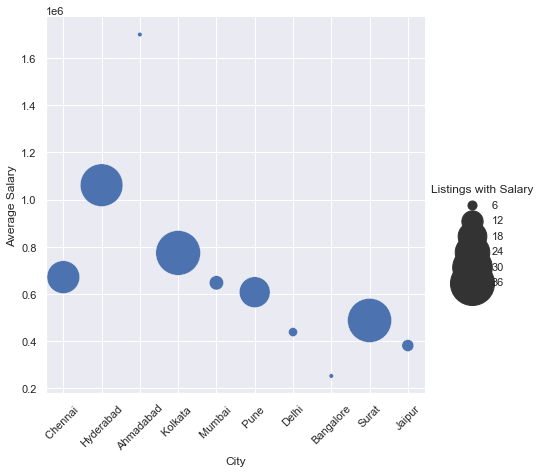

In [30]:
sns.set(rc={'figure.figsize':(4,4)})
ax = sns.relplot(x="City", y="Average Salary", size="Listings with Salary",
            sizes=(20, 2000), alpha=1,
            height=6, data=TopTen)
ax.set_xticklabels(labels=TopTen['City'].unique(),rotation=45)

The plot indicates the number of job listings with salary posted is very less in Ahmadabad compared to other cities. Let us remove Cities with less than 10 Salary entries to get a better picture.

[Text(0, 0, 'Chennai '),
 Text(1, 0, 'Hyderabad'),
 Text(2, 0, 'Kolkata '),
 Text(3, 0, 'Pune '),
 Text(4, 0, 'Surat')]

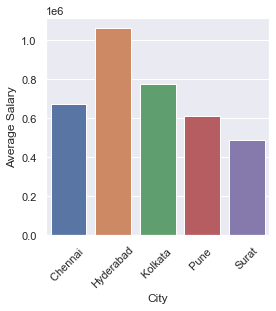

In [31]:
sns.set(rc={'figure.figsize':(4,4)})
ax = sns.barplot(data=TopTen[TopTen['Listings with Salary']>10],x='City',y='Average Salary')
ax.set_xticklabels(labels=TopTen[TopTen['Listings with Salary']>10]['City'].unique(),rotation=45)

As 9/7/2022, we can see Pune Having the highest average salary. This indicates Pune is great place for Data Anlayst jobs with the highest pay as well as highest job abundance with respect to population.

Drawbacks of Analysis:<br>
Source of population may not be accurate as population measures vary widely based of area of city and metropolitan area.<br>
Data scraping process is too time consuming, looking to implement faster options in the next phase. 